In [81]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import random
import pylab as pl
from sklearn.metrics import confusion_matrix,accuracy_score


In [82]:
train_path="animal_dataset2\\train"
class_names=os.listdir(train_path)

In [83]:
print(class_names)

['camel', 'cow', 'goat', 'horse', 'sheep']


In [84]:
image_paths=[]
image_classes=[]

In [85]:
def img_list(path):
    return (os.path.join(path,f) for f in os.listdir(path))

In [86]:
for training_name in class_names:
    dir_=os.path.join(train_path,training_name)
    class_path=img_list(dir_)
    image_paths+=class_path

In [87]:
len(image_paths)

500

In [88]:
image_classes_0=[0]*(len(image_paths)//5)
image_classes_1=[1]*(len(image_paths)//5)
image_classes_2=[2]*(len(image_paths)//5)
image_classes_3=[3]*(len(image_paths)//5)
image_classes_4=[4]*(len(image_paths)//5)
image_classes=image_classes_0+image_classes_1+image_classes_2+image_classes_3+image_classes_4
len(image_classes_0)

100

In [89]:
D=[]

In [90]:
for i in range(len(image_paths)):
    D.append((image_paths[i],image_classes[i]))

In [91]:
dataset = D
random.shuffle(dataset)
train = dataset
image_paths, y_train = zip(*train)

In [92]:
test_path="animal_dataset2\\validation"
class_names2=os.listdir(test_path)
image_paths2=[]
image_classes2=[]
for test_name in class_names2:
    dir_=os.path.join(test_path,test_name)
    class_path2=img_list(dir_)
    image_paths2+=class_path2
image_classes2_0=[0]*(len(image_paths2)//5)
image_classes2_1=[1]*(len(image_paths2)//5)
image_classes2_2=[2]*(len(image_paths2)//5)
image_classes2_3=[3]*(len(image_paths2)//5)
image_classes2_4=[4]*(len(image_paths2)//5)
image_classes2=image_classes2_0+image_classes2_1+image_classes2_2+image_classes2_3+image_classes2_4
len(image_classes2)
D2=[]
for i in range(len(image_paths2)):
    D2.append((image_paths2[i],image_classes2[i]))
dataset2 = D2
random.shuffle(dataset2)
test = dataset2
image_paths_test,y_test= zip(*test)

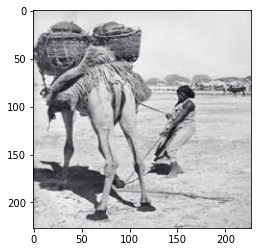

In [93]:
des_list=[]
orb=cv2.ORB_create()
im=cv2.imread(image_paths[2])
plt.imshow(im)

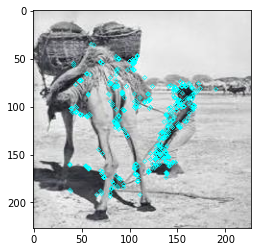

In [94]:
def draw_keypoints(vis, keypoints, color = (0, 255, 255)):
    for kp in keypoints:
            x, y = kp.pt
            plt.imshow(cv2.circle(vis, (int(x), int(y)), 2, color))
kp = orb.detect(im,None)
kp, des = orb.compute(im, kp)
img=draw_keypoints(im,kp)

In [164]:

for image_pat in image_paths:
    im=cv2.imread(image_pat)
    kp=orb.detect(im,None)
    keypoints,descriptor= orb.compute(im, kp)
    des_list.append((image_pat,descriptor))

In [96]:
descriptors=des_list[0][1]
for image_path,descriptor in des_list[1:]:
    descriptors=np.vstack((descriptors,descriptor))

In [97]:
descriptors.shape

(191545, 32)

In [98]:
descriptors_float=descriptors.astype(float)

In [143]:
from scipy.cluster.vq import kmeans,vq
k=500
voc,variance=kmeans(descriptors_float,k,1)

In [144]:
im_features=np.zeros((len(image_paths),k),"float32")
for i in range(len(image_paths)):
    words,distance=vq(des_list[i][1],voc)
    for w in words:
        im_features[i][w]+=1

In [145]:
from sklearn.preprocessing import StandardScaler
stdslr=StandardScaler().fit(im_features)
im_features=stdslr.transform(im_features)

In [146]:
from sklearn.svm import LinearSVC
clf=LinearSVC(max_iter=80000)
clf.fit(im_features,np.array(y_train))

LinearSVC(max_iter=80000)

In [147]:
LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=80000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

LinearSVC(max_iter=80000)

In [148]:
#Testing the Classification Model
des_list_test=[]
for image_pat in image_paths_test:
    image=cv2.imread(image_pat)
    kp=orb.detect(image,None)
    keypoints_test,descriptor_test= orb.compute(image, kp)
    des_list_test.append((image_pat,descriptor_test))

In [149]:
len(image_paths_test)

95

In [150]:
from scipy.cluster.vq import vq
test_features=np.zeros((len(image_paths_test),k),"float32")
for i in range(len(image_paths_test)):
    words,distance=vq(des_list_test[i][1],voc)
    for w in words:
        test_features[i][w]+=1

In [151]:
test_features.shape

(95, 500)

In [152]:
test_features=stdslr.transform(test_features)

In [153]:
true_classes=[]
for i in y_test:
    if i==0:
        true_classes.append("Camel")
    if i==1:
        true_classes.append("Cow")
    if i==2:
        true_classes.append("goat")
    if i==3:
        true_classes.append("Horse")
    if i==4:
        true_classes.append("sheep")


In [154]:
predict_classes=[]
for i in clf.predict(test_features):
    if i==0:
        predict_classes.append("Camel")
    if i==1:
        predict_classes.append("Cow")
    if i==2:
        predict_classes.append("goat")
    if i==3:
        predict_classes.append("Horse")
    if i==4:
        predict_classes.append("sheep")


In [155]:
print(true_classes)

['goat', 'sheep', 'goat', 'Horse', 'Cow', 'sheep', 'Horse', 'Horse', 'goat', 'Camel', 'Camel', 'goat', 'Cow', 'Camel', 'Horse', 'Camel', 'sheep', 'Cow', 'Camel', 'Cow', 'Camel', 'Camel', 'sheep', 'Horse', 'goat', 'sheep', 'Cow', 'goat', 'Camel', 'goat', 'goat', 'goat', 'Cow', 'goat', 'sheep', 'sheep', 'Camel', 'Cow', 'Horse', 'goat', 'goat', 'Cow', 'Horse', 'Cow', 'goat', 'Camel', 'Horse', 'sheep', 'sheep', 'sheep', 'Cow', 'Cow', 'Cow', 'Camel', 'Horse', 'Cow', 'Horse', 'goat', 'Camel', 'sheep', 'goat', 'goat', 'sheep', 'Camel', 'goat', 'sheep', 'sheep', 'Camel', 'Horse', 'Horse', 'Cow', 'Cow', 'sheep', 'sheep', 'Horse', 'Horse', 'Camel', 'Horse', 'goat', 'Cow', 'Camel', 'sheep', 'Cow', 'goat', 'Horse', 'sheep', 'Cow', 'Horse', 'sheep', 'Camel', 'Camel', 'Horse', 'Cow', 'Camel', 'Horse']


In [156]:
print(predict_classes)

['goat', 'Horse', 'goat', 'Horse', 'goat', 'Cow', 'goat', 'Horse', 'goat', 'Camel', 'sheep', 'Horse', 'Cow', 'Camel', 'Camel', 'Horse', 'Cow', 'Camel', 'Camel', 'Cow', 'goat', 'sheep', 'sheep', 'Cow', 'goat', 'Cow', 'Cow', 'goat', 'sheep', 'Cow', 'Camel', 'goat', 'Camel', 'sheep', 'Cow', 'Camel', 'Camel', 'Cow', 'Camel', 'goat', 'sheep', 'Cow', 'Horse', 'Horse', 'Cow', 'sheep', 'Horse', 'Horse', 'Horse', 'goat', 'Camel', 'goat', 'Horse', 'goat', 'sheep', 'Cow', 'Horse', 'Cow', 'goat', 'Horse', 'Camel', 'Camel', 'Camel', 'goat', 'Cow', 'sheep', 'goat', 'goat', 'goat', 'Cow', 'Cow', 'Cow', 'Horse', 'Cow', 'goat', 'Cow', 'goat', 'sheep', 'sheep', 'sheep', 'Camel', 'sheep', 'Camel', 'goat', 'Camel', 'Horse', 'Horse', 'goat', 'Cow', 'goat', 'Horse', 'goat', 'Horse', 'Camel', 'goat']


In [157]:
clf.predict(test_features)

array([2, 3, 2, 3, 2, 1, 2, 3, 2, 0, 4, 3, 1, 0, 0, 3, 1, 0, 0, 1, 2, 4,
       4, 1, 2, 1, 1, 2, 4, 1, 0, 2, 0, 4, 1, 0, 0, 1, 0, 2, 4, 1, 3, 3,
       1, 4, 3, 3, 3, 2, 0, 2, 3, 2, 4, 1, 3, 1, 2, 3, 0, 0, 0, 2, 1, 4,
       2, 2, 2, 1, 1, 1, 3, 1, 2, 1, 2, 4, 4, 4, 0, 4, 0, 2, 0, 3, 3, 2,
       1, 2, 3, 2, 3, 0, 2])

In [158]:
accuracy=accuracy_score(true_classes,predict_classes)
print(accuracy*100,"%")

31.57894736842105 %


In [159]:
import pandas as pd
lin_svm_predicted_mc = clf.predict(test_features)
lin_confusion_mc = confusion_matrix(y_test, lin_svm_predicted_mc)
df_cm = pd.DataFrame(lin_confusion_mc, 
                     index = [i for i in range(0,5)], columns = [i for i in range(0,5)])

Text(0.5, 15.0, 'Predicted label')

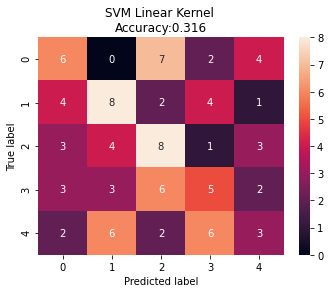

In [160]:
import seaborn as sns
plt.figure(figsize=(5.5,4))
sns.heatmap(df_cm, annot=True)
plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, 
                                                                       lin_svm_predicted_mc)))
plt.ylabel('True label')
plt.xlabel('Predicted label')

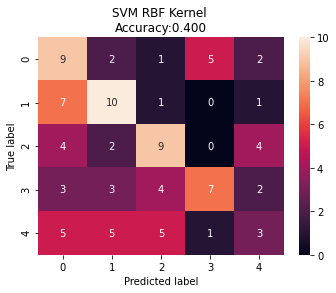

In [161]:
# SVM with Radial Basis Function (RBF) 
from sklearn.svm import SVC
svm = SVC(kernel = 'rbf', gamma='auto').fit(im_features,np.array(y_train))
svm_predicted_mc = svm.predict(test_features)
confusion_mc = confusion_matrix(y_test, svm_predicted_mc)
df_cm = pd.DataFrame(confusion_mc, index = [i for i in range(0,5)],
                  columns = [i for i in range(0,5)])

plt.figure(figsize = (5.5,4))
sns.heatmap(df_cm, annot=True)
plt.title('SVM RBF Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, 
                                                                    svm_predicted_mc)))
plt.ylabel('True label')
plt.xlabel('Predicted label');

In [140]:
svm.score(im_features, y_train)

0.966

In [141]:
from sklearn.metrics import classification_report

print('\n Classification report for Linear SVM\n\n\n',
      classification_report(y_test, lin_svm_predicted_mc))    


 Classification report for Linear SVM


               precision    recall  f1-score   support

           0       0.19      0.21      0.20        19
           1       0.32      0.42      0.36        19
           2       0.39      0.47      0.43        19
           3       0.38      0.26      0.31        19
           4       0.15      0.11      0.12        19

    accuracy                           0.29        95
   macro avg       0.29      0.29      0.29        95
weighted avg       0.29      0.29      0.29        95



In [142]:
print('\n Classification report for SVM with RBF kernel\n\n\n', 
      classification_report(y_test, svm_predicted_mc))


 Classification report for SVM with RBF kernel


               precision    recall  f1-score   support

           0       0.43      0.63      0.51        19
           1       0.53      0.47      0.50        19
           2       0.39      0.47      0.43        19
           3       0.54      0.37      0.44        19
           4       0.36      0.26      0.30        19

    accuracy                           0.44        95
   macro avg       0.45      0.44      0.44        95
weighted avg       0.45      0.44      0.44        95

